In [3]:
import os
import gc
import re
#import folium
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import scipy as sp
import pandas as pd
 

import random
import math
import time

import datetime
import operator 


#import pycountry
from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import nltk
#from textblob import TextBlob
#from wordcloud import WordCloud
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import random
import networkx as nx
from pandas import Timestamp

import requests
from IPython.display import HTML

import seaborn as sns
#from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')
%matplotlib inline

In [55]:
research_df = pd.read_csv("Data/Research_Paper_Data.csv")

In [56]:
research_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29316 entries, 0 to 29315
Data columns (total 3 columns):
abstract    7091 non-null object
doc_id      29315 non-null object
title       25732 non-null object
dtypes: object(3)
memory usage: 687.2+ KB


In [6]:
research_df.head()

,Unnamed: 0,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,abstract_words
0,0,05326cc45fa2898c5850df85d30dad3d2c82acef,References 1. STI Study Group. Syphilis and go...,"J P Doris, K Saha, N P Jones","J P Doris, K Saha, N P Jones",NaN,\n\nA quatic wild birds are the natural reserv...,"Evolution and ecology of influenza A viruses, ...","[{'first': 'J', 'middle': ['P'], 'last': 'Dori...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Evoluti...",0
1,1,4c7759f1da349496e9308d9f4f0d4e071a23c19f,NaN,NaN,NaN,NaN,\n\nP andemic preparedness ideally would inclu...,Avian influenza: assessing the pandemic threat...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Avian i...",0
2,2,4fc3b508543068a9d54f11f0ecf52580df768307,NaN,"Carol Y Rao, Grace W Goryoka, Olga L Henao, Ke...","Carol Y Rao (Emory University, Atlanta (G.W. G...",Abstract\n\nThe Centers for Disease Control an...,\n\nI nfectious disease outbreaks present a se...,US Centers for Disease Control and Prevention ...,"[{'first': 'Carol', 'middle': ['Y'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'US Cent...",145
3,3,867e1b0f6ca8757f2a32a625d99b23888ab40d49,"Comparisons of substitution, insertion and del...","Mazen W Karaman, Susan Groshen, Chi-Chiang Lee...","Mazen W Karaman, Susan Groshen (University of ...",Abstract\n\nAlthough oligonucleotide probes co...,INTRODUCTION\n\nOligonucleotide microarrays ar...,Sequence variation in genes and genomic DNA: m...,"[{'first': 'Mazen', 'middle': ['W'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Sequenc...",264
4,4,713670f3bba541ae77e6ac7bb32c9ea27c01e19d,Transmission of Middle East Respiratory Syndro...,"Jennifer C Hunter, Duc Nguyen, Bashir Aden, Zy...","Jennifer C Hunter (1600 Clifton Road NE, Mails...",Abstract\n\nMiddle East respiratory syndrome c...,M iddle East respiratory syndrome coronavirus ...,Middle East respiratory syndrome coronavirus i...,"[{'first': 'Jennifer', 'middle': ['C'], 'last'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Middle ...",130


In [41]:
df_all = pd.read_csv("Data/covid_19_clean_complete.csv",parse_dates=['Date'])

In [42]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 8 columns):
Province/State    7598 non-null object
Country/Region    16066 non-null object
Lat               16066 non-null float64
Long              16066 non-null float64
Date              16066 non-null datetime64[ns]
Confirmed         16066 non-null int64
Deaths            16066 non-null int64
Recovered         16066 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1004.2+ KB


In [43]:
df_all.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [44]:
df_all[['Province/State']] = df_all[['Province/State']].fillna('')

In [45]:
df_all['Active'] = df_all['Confirmed'] - df_all['Deaths'] - df_all['Recovered']

In [46]:
df_country = df_all.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [4]:
def new_len(x):
    if type(x) is str:
        return len(x.split())
    else:
        return 0

In [5]:
research_df["abstract_words"] = research_df["abstract"].apply(new_len)

In [11]:
word_count = research_df.query("abstract_words !=0 and abstract_words <500")["abstract_words"]

In [12]:
word_count.head()

2     145
3     264
4     130
11    228
12     74
Name: abstract_words, dtype: int64

In [14]:
fig = ff.create_distplot(hist_data=[word_count],
                         group_labels=["All abstracts"],
                         colors=["blue"])
fig.update_layout(title_text="Abstract words", xaxis_title="Abstract words", template="simple_white", showlegend=False)
fig.show()

In the above distribution plot, we can see that the abstract length has a roughly normal distribution with several minor peaks on either side of the mean. The probability density peaks at around 200 words, indicating that this is the most plausible value.

In [26]:
def polar(x):
    if type(x) is str:
        return sia.polarity_scores(x)
    else:
        return 100

In [27]:
sia = SentimentIntensityAnalyzer()

In [29]:
polar_0 = [pol for pol in research_df["abstract"].apply(lambda x: polar(x)) if pol != 100]

In [31]:
fig = go.Figure(go.Histogram(x=[pols["neg"] for pols in polar_0 if pols["neg"] < 0.15], marker=dict(
        color='seagreen'
    )))
fig.update_layout(xaxis_title="Negativity sentiment", title_text="Negativity sentiment", template="simple_white")
fig.show()

From the above plot, we can see that the negative sentiment has maximum probability mass at 0, indicating that a large number of articles show no negativity. The distribution also has a slight rightward (positive) skew, indicating that lower values of negativity are more likely. Very few abstracts have negativity greater than 0.15, indicating that most abstracts do not project a negative view.

In [32]:
fig = go.Figure(go.Histogram(x=[pols["pos"] for pols in polar_0 if pols["pos"] < 0.15], marker=dict(
        color='indianred'
    )))
fig.update_layout(xaxis_title="Positivity sentiment", title_text="Positivity sentiment", template="simple_white")
fig.show()

From the above plot, we can see that the positive sentiment has maximum probability mass at 0 (similar to the negative sentiment distribution), indicating that a large number of articles show no negativity. The distribution also has a very slight rightward (positive) skew, indicating that lower values of positivity are more likely. Very few abstracts have positivity greater than 0.15, indicating that most abstracts do not project a positive view. These results make sense because research is meant to be object, and not project emotions, whether positive or negative.

In [33]:
fig = go.Figure(go.Histogram(x=[pols["neu"] for pols in polar_0], marker=dict(
        color='dodgerblue'
    )))
fig.update_layout(xaxis_title="Neutrality sentiment", title_text="Neutrality sentiment", template="simple_white")
fig.show()

From the above plot, we can see that the neutrality sentiment distribution has a strong leftward (negative) skew, which is in constrast to the negativity and positivity sentiment distributions. There is also a significant peak at 1 (the maximum value). This suggests that the abstracts tend to be very neutral and unbiased in general, which is great news. After all, research papers are meant to spread facts and not opinion.

In [34]:
def nonan(x):
    if type(x) is str:
        return x.replace("\n","")
    else:
        return ""

In [35]:
text = ' '.join([nonan(abstract) for abstract in research_df["abstract"]])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
fig = px.imshow(wordcloud)
fig.update_layout(title_text='Common words in abstracts')

NameError: name 'WordCloud' is not defined

In [36]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ

    elif nltk_tag.startswith('V'):
        return wordnet.VERB

    elif nltk_tag.startswith('N'):
        return wordnet.NOUN

    elif nltk_tag.startswith('R'):
        return wordnet.ADV

    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []

    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    return " ".join(lemmatized_sentence)

def clean_text(abstract):
    abstract = abstract.replace(". ", " ").replace(", ", " ").replace("! ", " ")\
                       .replace("? ", " ").replace(": ", " ").replace("; ", " ")\
                       .replace("( ", " ").replace(") ", " ").replace("| ", " ").replace("/ ", " ")
    if "." in abstract or "," in abstract or "!" in abstract or "?" in abstract or ":" in abstract or ";" in abstract or "(" in abstract or ")" in abstract or "|" in abstract or "/" in abstract:
        abstract = abstract.replace(".", " ").replace(",", " ").replace("!", " ")\
                           .replace("?", " ").replace(":", " ").replace(";", " ")\
                           .replace("(", " ").replace(")", " ").replace("|", " ").replace("/", " ")
    abstract = abstract.replace("  ", " ")
    
    for word in list(set(stopwords.words("english"))):
        abstract = abstract.replace(" " + word + " ", " ")

    return lemmatize_sentence(abstract).lower()

def get_similar_words(word, num):
    vec = model_wv_df[word].T
    distances = np.linalg.norm(model_wv_df.subtract(model_wv_df[word], 
                                                    axis=0).values, axis=0)

    indices = np.argsort(distances)
    top_distances = distances[indices[1:num+1]]
    top_words = model_wv_vocab[indices[1:num+1]]
    return top_words

def visualize_word_list(color, word):
    top_words = get_similar_words(word, num=6)
    relevant_words = [get_similar_words(word, num=8) for word in top_words]
    fig = make_subplots(rows=3, cols=2, subplot_titles=tuple(top_words), vertical_spacing=0.05)
    for idx, word_list in enumerate(relevant_words):
        words = [word for word in word_list if word in model_wv_vocab]
        X = model_wv_df[words].T
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        df = pd.DataFrame(result, columns=["Component 1", "Component 2"])
        df["Word"] = word_list
        word_emb = df[["Component 1", "Component 2"]].loc[0]
        df["Distance"] = np.sqrt((df["Component 1"] - word_emb[0])**2 + (df["Component 2"] - word_emb[1])**2)
        plot = px.scatter(df, x="Component 1", y="Component 2", text="Word", color="Distance", color_continuous_scale=color, size="Distance")
        plot.layout.title = top_words[idx]
        plot.update_traces(textposition='top center')
        plot.layout.xaxis.autorange = True
        fig.add_trace(plot.data[0], row=(idx//2)+1, col=(idx%2)+1)
    fig.layout.coloraxis.showscale = False
    fig.update_layout(height=1400, title_text="2D PCA of words related to {}".format(word), paper_bgcolor="#f0f0f0", template="plotly_white")
    fig.show()

def visualize_word(color, word):
    top_words = get_similar_words(word, num=20)
    words = [word for word in top_words if word in model_wv_vocab]
    X = model_wv_df[words].T
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    df = pd.DataFrame(result, columns=["Component 1", "Component 2"])
    df["Word"] = top_words
    if word == "antimalarial":
        df = df.query("Word != 'anti-malarial' and Word != 'anthelmintic'")
    if word == "doxorubicin":
        df = df.query("Word != 'anti-rotavirus'")
    word_emb = df[["Component 1", "Component 2"]].loc[0]
    df["Distance"] = np.sqrt((df["Component 1"] - word_emb[0])**2 + (df["Component 2"] - word_emb[1])**2)
    fig = px.scatter(df, x="Component 1", y="Component 2", text="Word", color="Distance", color_continuous_scale=color, size="Distance")
    fig.layout.title = word
    fig.update_traces(textposition='top center')
    fig.layout.xaxis.autorange = True
    fig.layout.coloraxis.showscale = True
    fig.update_layout(height=800, title_text="2D PCA of words related to {}".format(word), template="plotly_white", paper_bgcolor="#f0f0f0")
    fig.show()

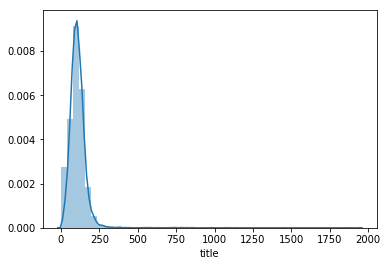

In [38]:
research_df[['title']] = research_df[['title']].fillna('')
headline_length=research_df['title'].str.len()
sns.distplot(headline_length)
plt.show()

In [47]:
tbl = df_all.sort_values(by=["Country/Region", "Date"]).reset_index(drop=True)
tbl["Country"] = tbl["Country/Region"]
conts = sorted(list(set(tbl["Country"])))
dates = sorted(list(set(tbl["Date"])))

confirmed = []
for idx in range(len(conts)):
    confirmed.append(tbl.query('Country == "{}"'.format(conts[idx])).groupby("Date").sum()["Confirmed"].values)
confirmed = np.array(confirmed)

In [48]:
def visualize_country(fig, cont, image_link, colors, step, xcor, ycor, done=True, multiple=False, sizex=0.78, sizey=0.2):
    if not done:
        showlegend = True
    else:
        showlegend = False
    for idx, color in enumerate(colors):
        fig.add_trace(go.Scatter(x=dates, y=confirmed[conts.index(cont)]-step*idx, showlegend=showlegend,
                    mode='lines+markers', name=cont,
                         marker=dict(color=colors[idx])))
    fig.add_layout_image(
        dict(
            source=image_link,
            xref="paper", yref="paper",
            x=xcor, y=ycor,
            sizex=sizex, sizey=sizey,
            xanchor="right", yanchor="bottom"
        )
    )
    title = "Confirmed cases in {}".format(cont) if done else "Confirmed cases"
    if multiple: title = "Confirmed cases"
    fig.update_layout(xaxis_title="Date", yaxis_title="Confirmed cases", title=title, template="plotly_white", paper_bgcolor="#f0f0f0")
    if done:
        fig.show()

In [50]:
fig = go.Figure()
visualize_country(fig, "India", "https://upload.wikimedia.org/wikipedia/en/0/03/Flag_of_India.svg", colors=["green"], step=400, xcor=0.85, ycor=0.7)

In [53]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=96744 sha256=4d1b1379363f82530664c64278a0712a0a33871bf535632713bf20472e224d55
  Stored in directory: c:\users\sanchit tiwari\appdata\local\pip\cache\wheels\a1\f3\8a\c46924c44ee290a85840f98cab840a65669cd377175eaf6850
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-py3-none-any.whl size=74574 sha256=f188ca09fa44544309d2adc7a6060d1f81cdd97a3c4b7b30464180d17f7b568c
  Stored in directory: c:\users\sanchit tiwari\appdata\local\pip\cache\wheels\35\8d\af\a922cb18800b31fadac3523cadf6c1efdf233b788fe7a4da70
Successfully built smart-open googleapis-common-protos
  Attempting uninstall: setuptools
    Found existing installation: setuptools 38.4.0
    Uninstalling setuptools-38.4.0:
      Successfully uninstalled setuptools-38.4.0


In [4]:

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-05-2020.csv')

In [5]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-05 23:06:45,34.223334,-82.461707,6,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-05 23:06:45,30.295065,-92.414197,75,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-05 23:06:45,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-05 23:06:45,43.452658,-116.241552,385,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-05 23:06:45,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [6]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [7]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [8]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [9]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,0,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,0,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,0,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,0,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,0,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
india_cases = []

In [14]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())

In [15]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
india_daily_increase = daily_increase(india_cases)

In [17]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506]

In [18]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [19]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [20]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [21]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False)

In [ ]:
# use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5, 6, 7]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)
# svm_search.best_params_

In [22]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 24676.382159709974
MSE: 1032979715.9709945


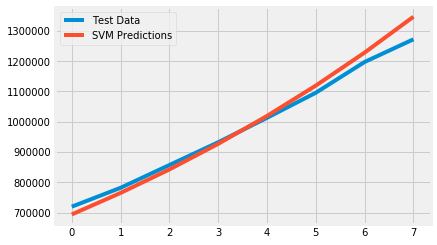

In [23]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [25]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [26]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 98258.64633954287
MSE: 14246138358.676472


In [27]:
print(linear_model.coef_)

[[-5.33691848e+02  3.43041214e+02  7.76490424e+01  6.46109666e+00
  -3.28833406e-01  3.73624538e-03]]


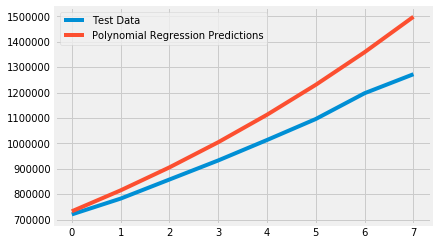

In [28]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [29]:

# bayesian ridge polynomial regression
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'tol': [0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [30]:
RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'tol': [0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'tol': [0.0001, 0.001, 0.01], 'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [31]:
RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'tol': [0.0001, 0.001, 0.01]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=-1,
          param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001], 'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_1': [1e-07, 1e-06, 1e-05, 0.0001], 'lambda_2': [1e-07, 1e-06, 1e-05, 0.0001], 'tol': [0.0001, 0.001, 0.01]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [32]:
bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 1e-07,
 'lambda_1': 0.0001,
 'lambda_2': 1e-07,
 'tol': 0.0001}

In [33]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 153254.24883283488
MSE: 25984463649.639656


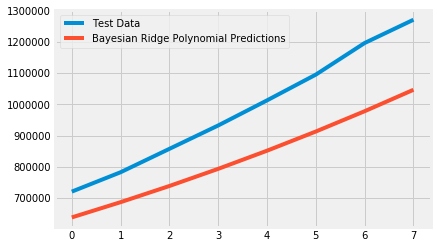

In [34]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

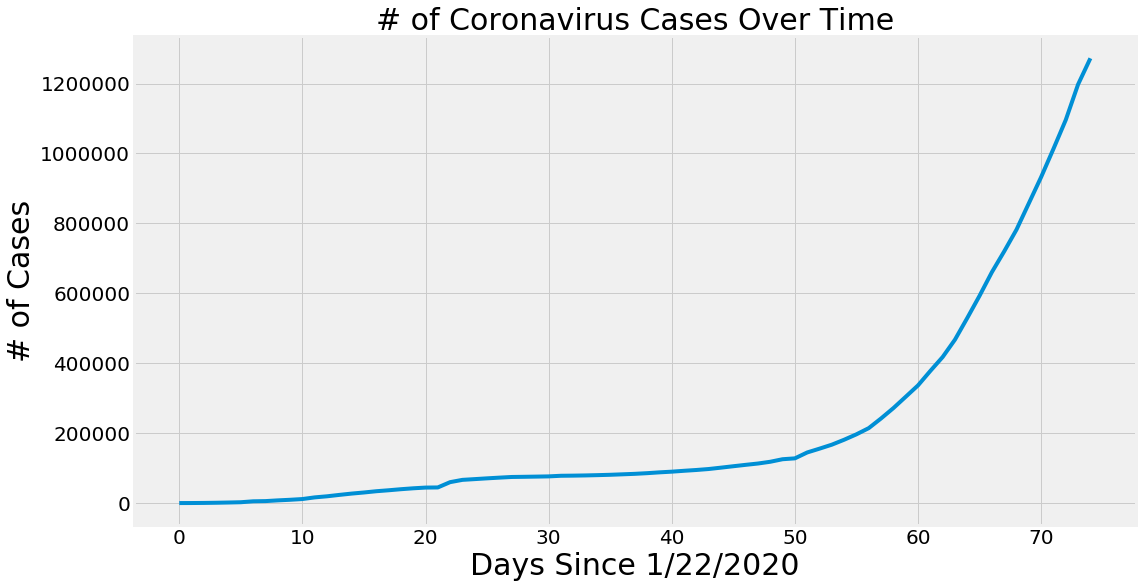

In [35]:

adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

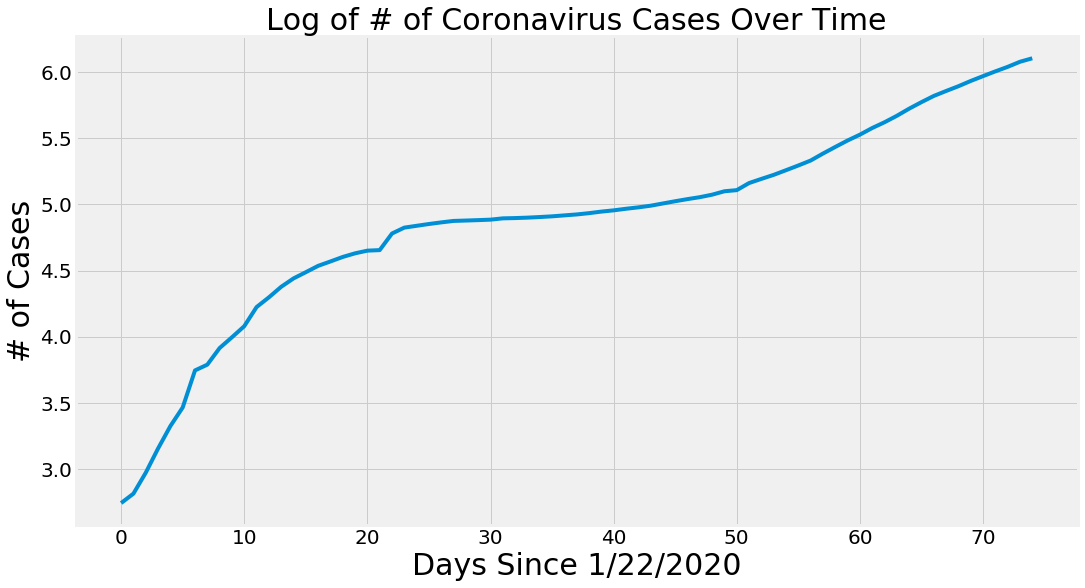

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

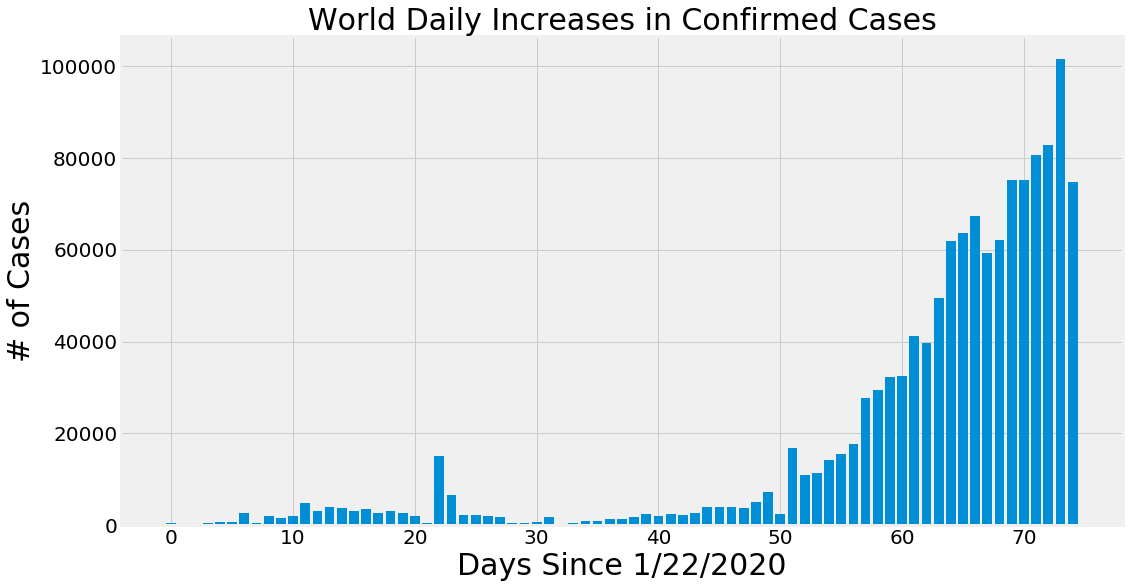

In [37]:

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

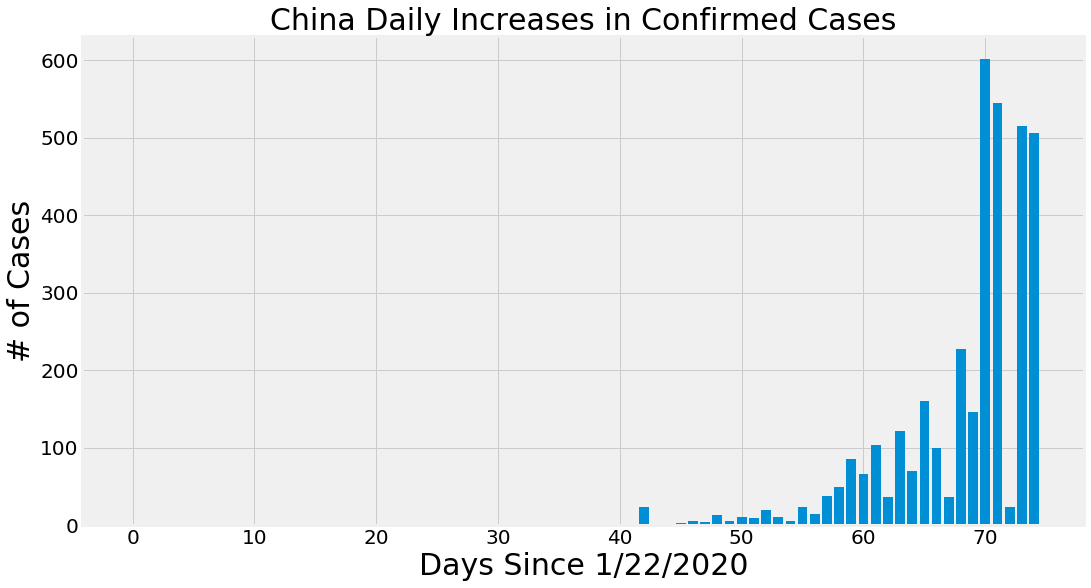

In [38]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

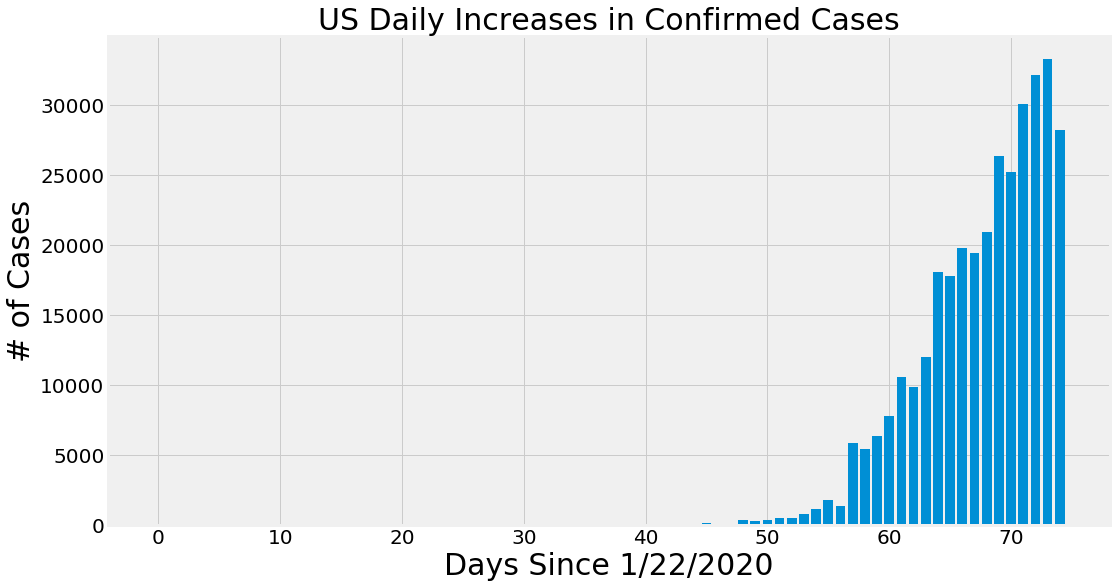

In [39]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

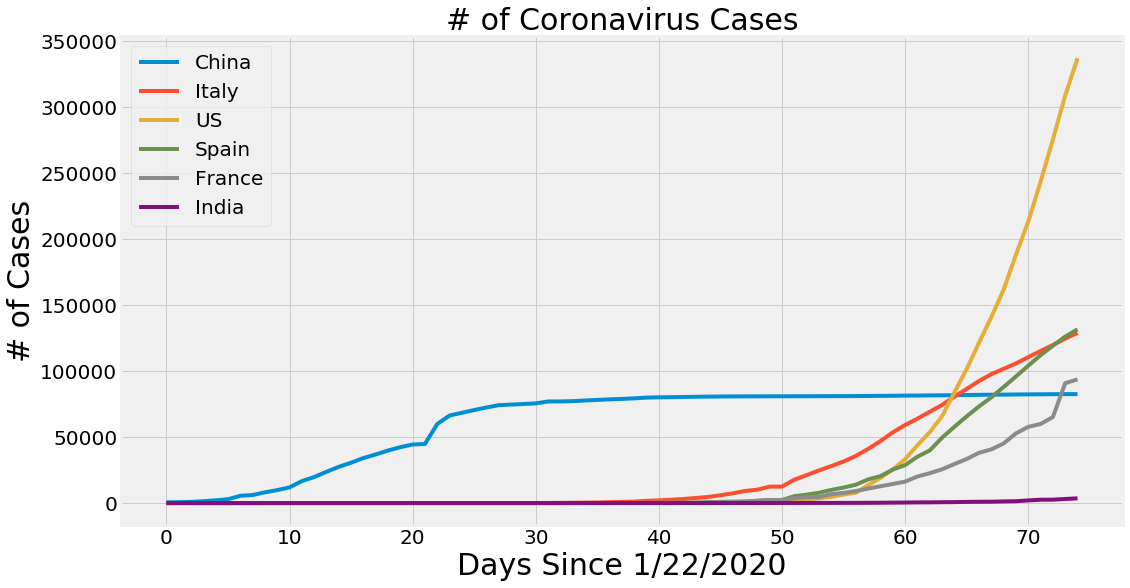

In [41]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, france_cases)
plt.plot(adjusted_dates, india_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain', 'France','India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

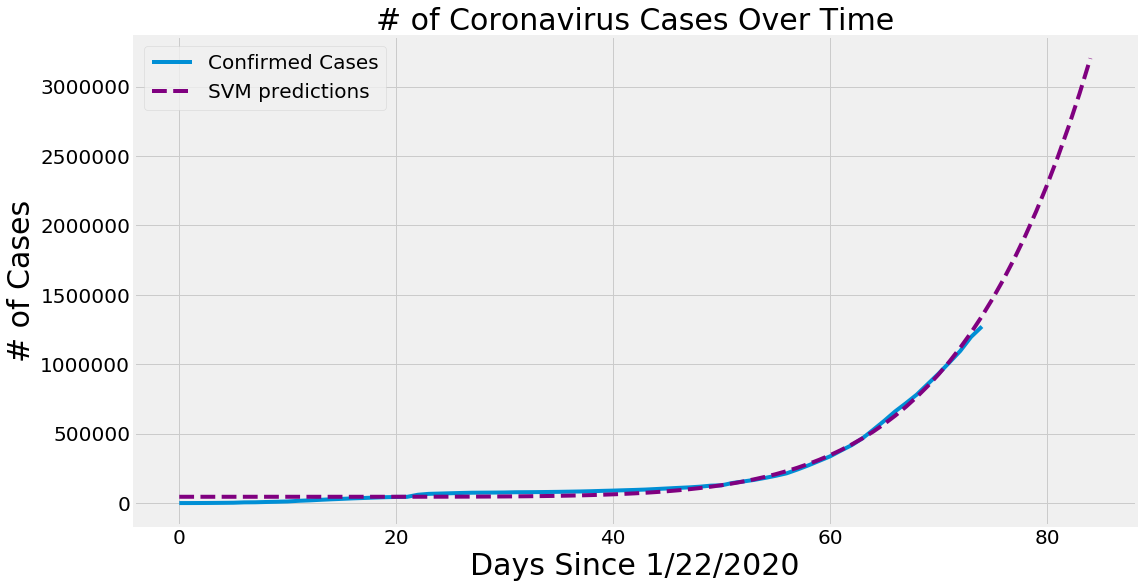

In [42]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

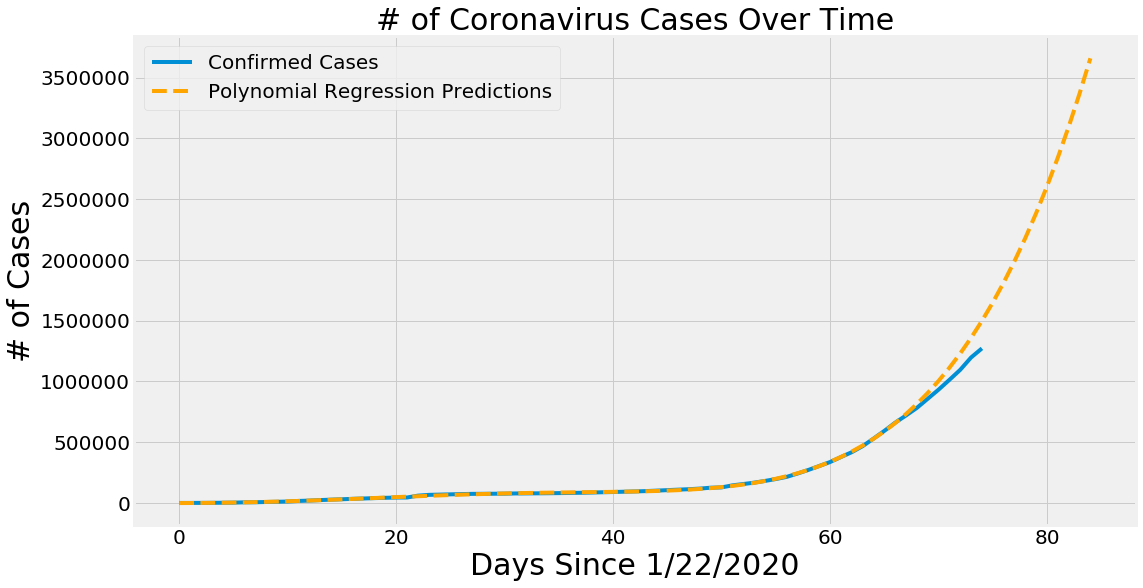

In [43]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

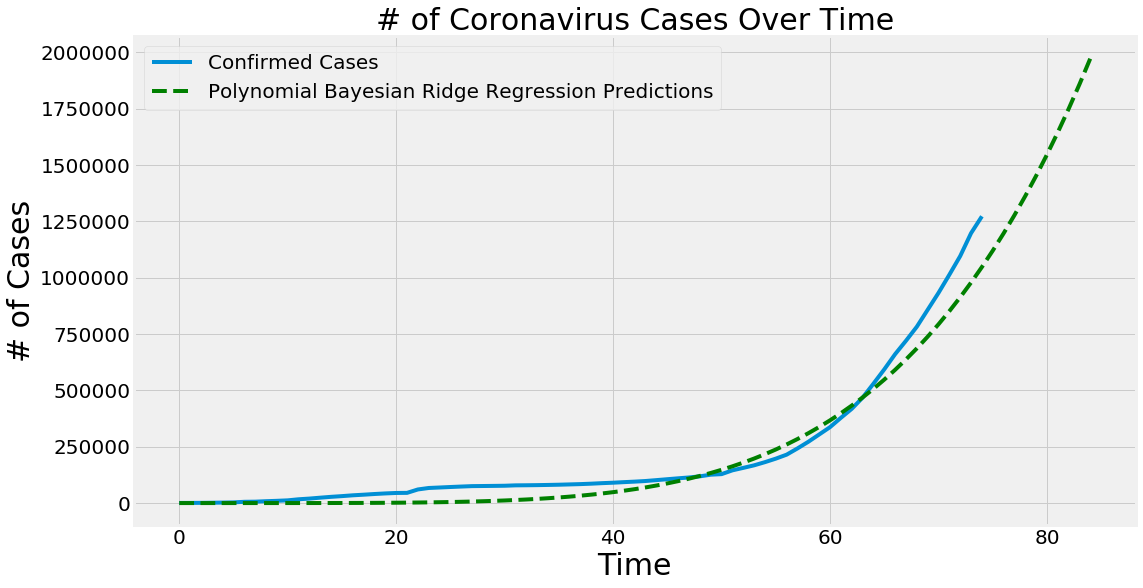

In [44]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [45]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('04/06/2020', 1474637.0),
 ('04/07/2020', 1613444.0),
 ('04/08/2020', 1763653.0),
 ('04/09/2020', 1926035.0),
 ('04/10/2020', 2101399.0),
 ('04/11/2020', 2290601.0),
 ('04/12/2020', 2494537.0),
 ('04/13/2020', 2714153.0),
 ('04/14/2020', 2950439.0),
 ('04/15/2020', 3204439.0)}

In [46]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('04/06/2020', 1649536.0),
 ('04/07/2020', 1813052.0),
 ('04/08/2020', 1989681.0),
 ('04/09/2020', 2180172.0),
 ('04/10/2020', 2385297.0),
 ('04/11/2020', 2605858.0),
 ('04/12/2020', 2842682.0),
 ('04/13/2020', 3096626.0),
 ('04/14/2020', 3368575.0),
 ('04/15/2020', 3659442.0)}

In [47]:

# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

Ridge regression future predictions:


{('04/06/2020', 1119837.0),
 ('04/07/2020', 1196479.0),
 ('04/08/2020', 1277260.0),
 ('04/09/2020', 1362347.0),
 ('04/10/2020', 1451909.0),
 ('04/11/2020', 1546121.0),
 ('04/12/2020', 1645162.0),
 ('04/13/2020', 1749214.0),
 ('04/14/2020', 1858465.0),
 ('04/15/2020', 1973108.0)}

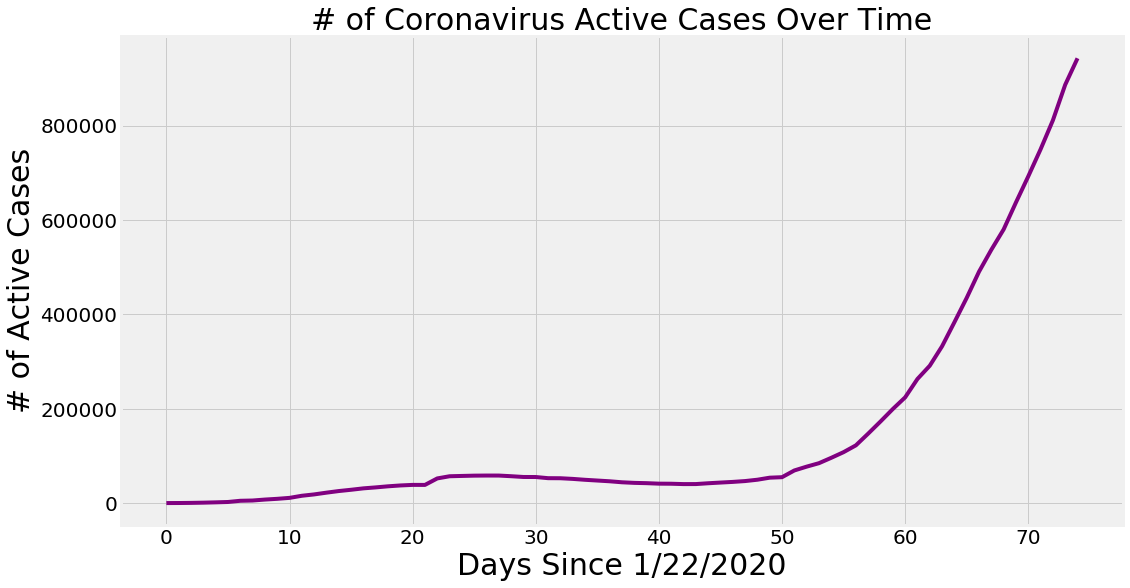

In [48]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active, color='purple')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

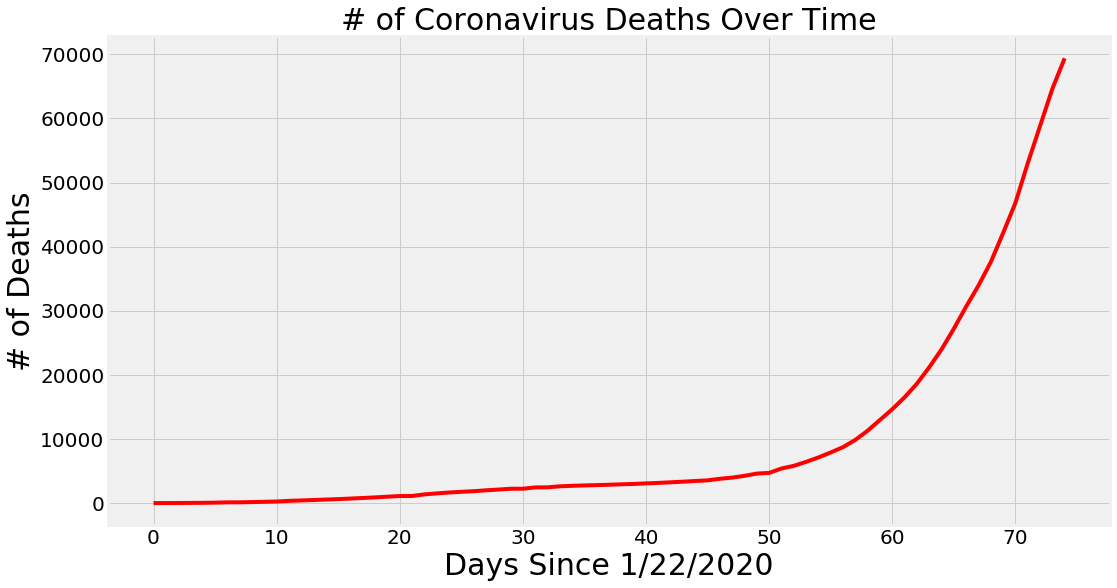

In [50]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

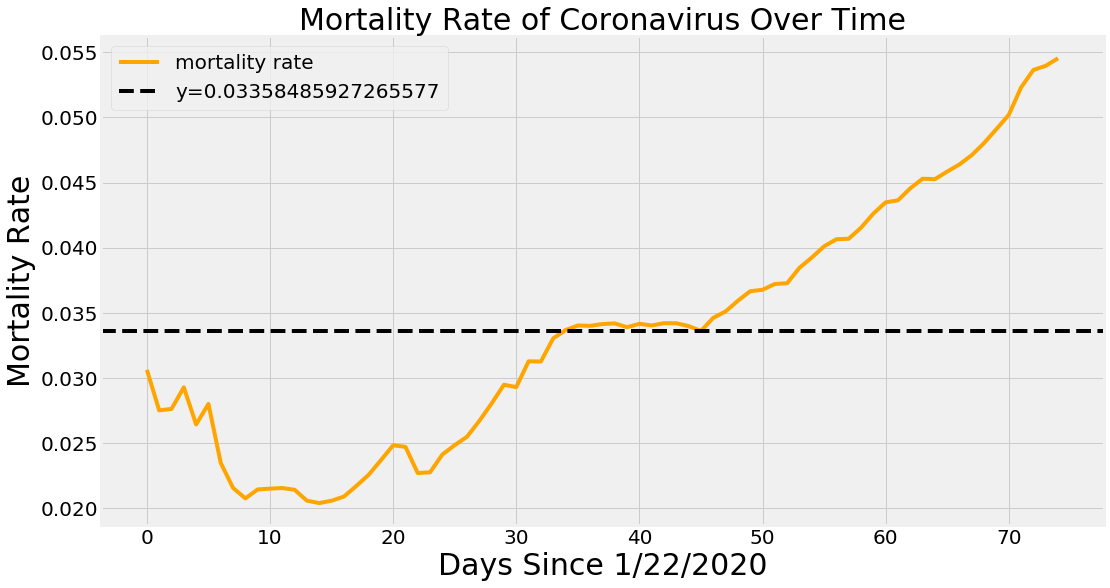

In [51]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

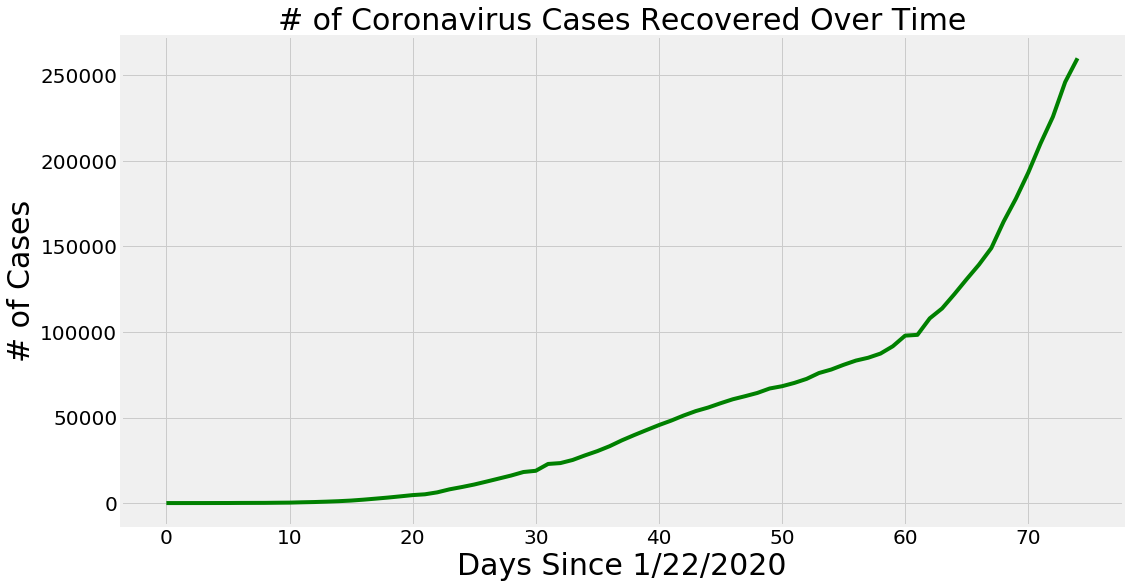

In [53]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

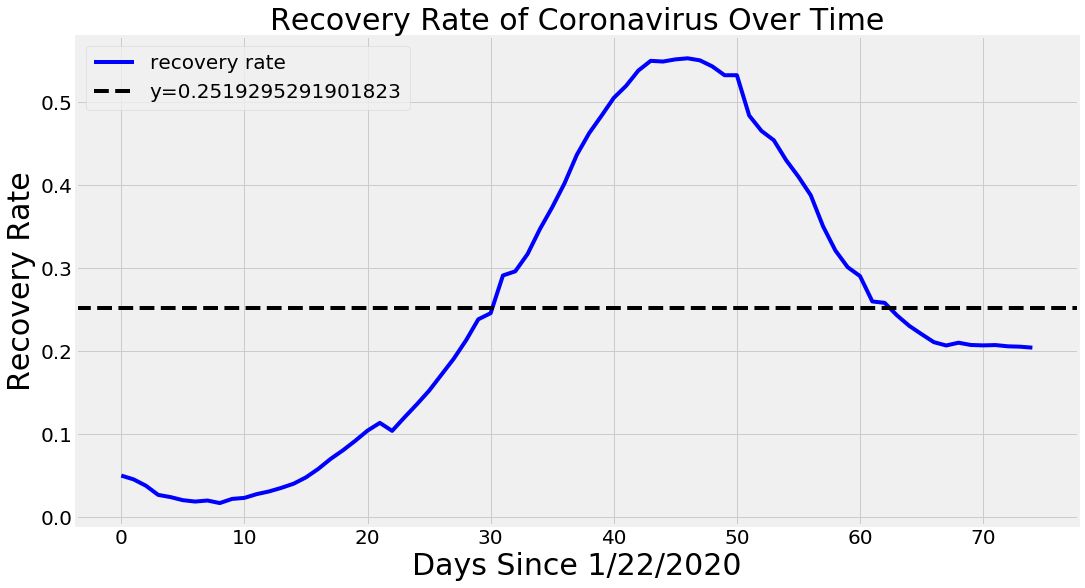

In [54]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

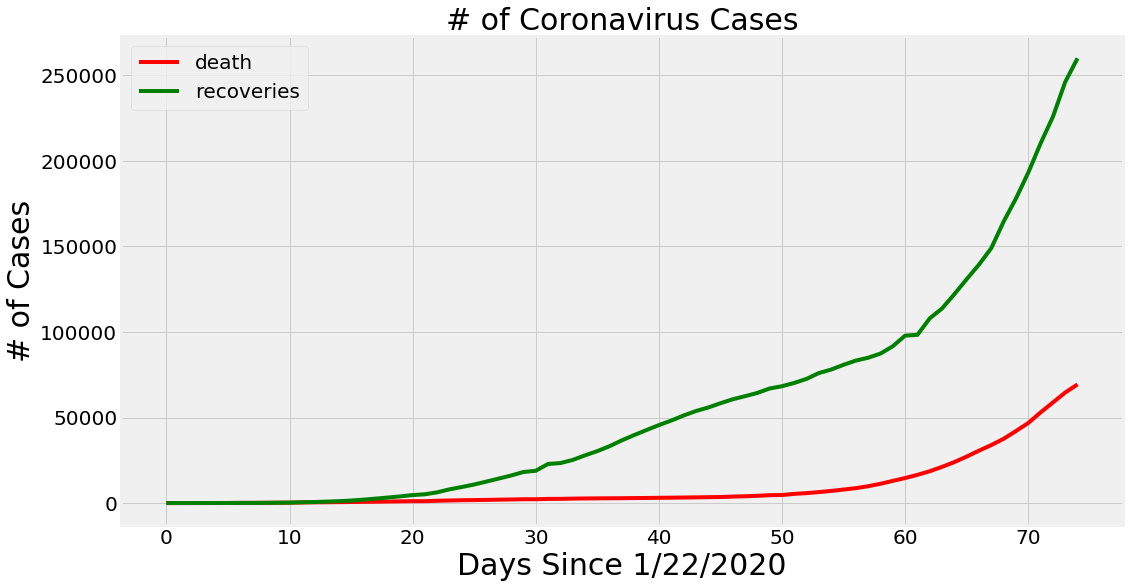

In [55]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

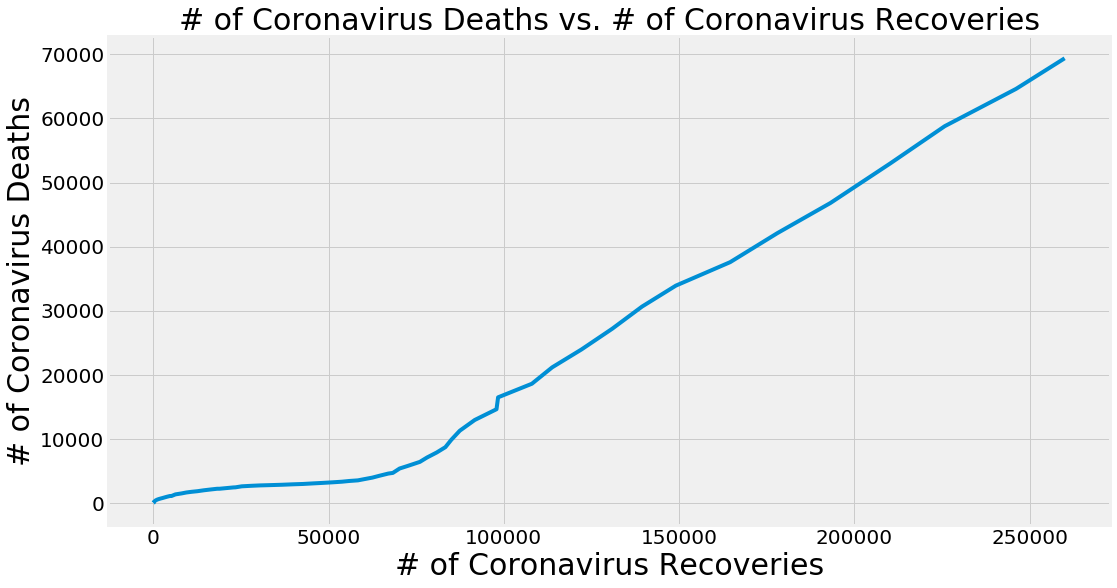

In [56]:
plt.figure(figsize=(16, 9))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [57]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [58]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [59]:

country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,337072,9619,17448,310005,0.0285369
1,Spain,131646,12641,38080,80925,0.0960227
2,Italy,128948,15887,21815,91246,0.123205
3,Germany,100123,1584,28700,69839,0.0158205
4,France,93773,8093,16349,69331,0.0863042
5,China,82602,3333,77207,2062,0.0403501
6,Iran,58226,3603,19736,34887,0.0618796
7,United Kingdom,48436,4943,229,43264,0.102052
8,Turkey,27069,574,1042,25453,0.0212051
9,Switzerland,21100,715,6415,13970,0.0338863


In [60]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [61]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [64]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': province_country, 'Number of Confirmed Cases': province_confirmed_cases,
                          'Number of Deaths': province_death_cases, 'Number of Recoveries' : province_recovery_cases,
                          'Mortality Rate': province_mortality_rate})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,123160,4159,0,0.0337691
1,Hubei,China,67803,3210,63945,0.047343
2,New Jersey,US,37505,917,0,0.0244501
3,Michigan,US,15718,617,0,0.0392544
4,California,US,15034,348,0,0.0231475
5,Louisiana,US,13010,477,0,0.0366641
6,Massachusetts,US,12500,231,0,0.01848
7,Florida,US,12350,221,0,0.0178947
8,Pennsylvania,US,11589,151,0,0.0130296
9,Illinois,US,11259,274,0,0.0243361
